In [ ]:
!pip install pmdarima 

  Using cached https://files.pythonhosted.org/packages/4b/15/0dfc38deb2f5582b79baff6523b245d6a3dbe877e3fb96a1ee39ec63b626/pmdarima-1.6.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cb/83/540fd83238a18abe6c2d280fa8e489ac5fcefa1f370f0ca1acd16ae1b860/statsmodels-0.11.1-cp36-cp36m-manylinux1_x86_64.whl


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from dateutil.parser import parse
from pmdarima.arima import auto_arima
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sn

In [ ]:
# Uploading file into google colab

from google.colab import files
data_upload = files.upload()

Saving AMD.csv to AMD.csv


In [ ]:
import io
d1 = pd.read_csv(io.BytesIO(data_upload['AMD.csv']),date_parser=['Date'])
d1.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-22,4.43,4.43,4.25,4.26,4.26,8274300
1,2009-05-26,4.26,4.57,4.23,4.53,4.53,16094300
2,2009-05-27,4.57,4.80,4.55,4.71,4.71,21512600


In [ ]:
d1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
d1.index = d1.index+1
d1.rename(columns={'Close':'Value'},inplace=True)
d1.drop(['Open','High','Low','Adj Close','Volume'],axis=1)

,Date,Value
1,2009-05-22,4.260000
2,2009-05-26,4.530000
3,2009-05-27,4.710000
4,2009-05-28,4.700000
5,2009-05-29,4.540000
...,...,...
2331,2018-08-23,22.290001
2332,2018-08-24,23.980000
2333,2018-08-27,25.260000
2334,2018-08-28,25.049999


Text(0.5, 1.0, 'AMD stock price movement')

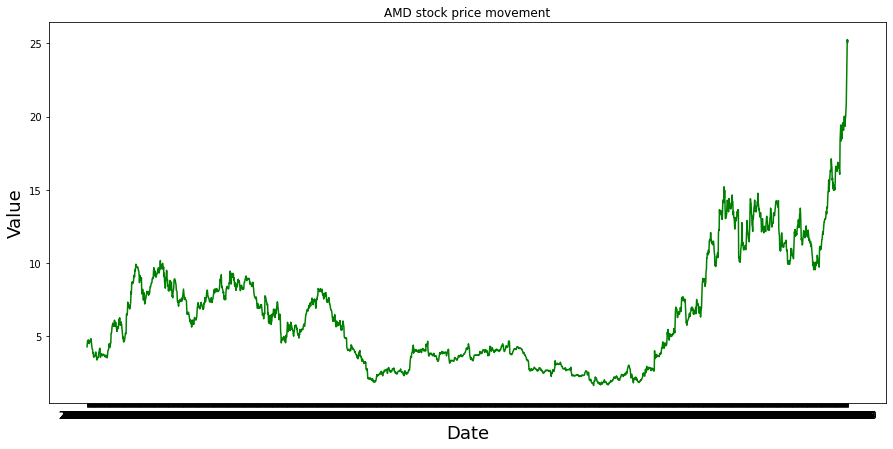

In [ ]:
plt.figure(figsize=(15,7))

plt.plot(d1['Date'],d1['Value'],color='Green')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Value', fontsize= 18)
plt.title('AMD stock price movement')

### Checking the time series values are stationary or non- stationary using ADF test. 

Pvalue < AFD the time series data is Non-Stationary

In [ ]:
x= d1['Value'].values
val = adfuller(x)

print("ADF Statistics: % .2f"% val[0])
print('P-Value: % 0.2f'% val[1])
print('Critical Value')

for k,v in val[4]. items():
  print(k,'%0.2f'% v)

if val[4] ['5%'] < val[0]:
  print('Fail to reject H0, Time series data is Non-Stationary')

else:
  print('Reject H0, Time series data is Stationary')

ADF Statistics:  2.12
P-Value:  1.00
Critical Value
1% -3.43
5% -2.86
10% -2.57
Fail to reject H0, Time series data is Non-Stationary


### Checking for seasonality in time series data

In [ ]:
# Multipicative Decomposition

mult_decomp =  seasonal_decompose(d1['Value'],model="multiplicative",extrapolate_trend='freq',period=10)

# Additive Decompostion

add_decomp =  seasonal_decompose(d1['Value'],model='additive',period=10,extrapolate_trend='freq')


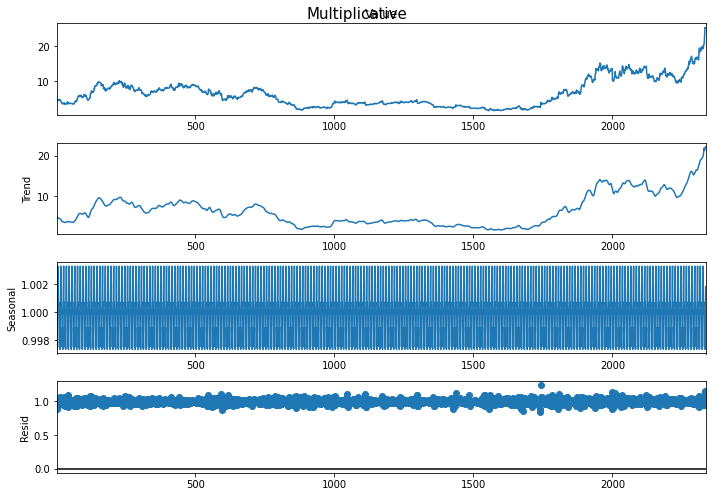

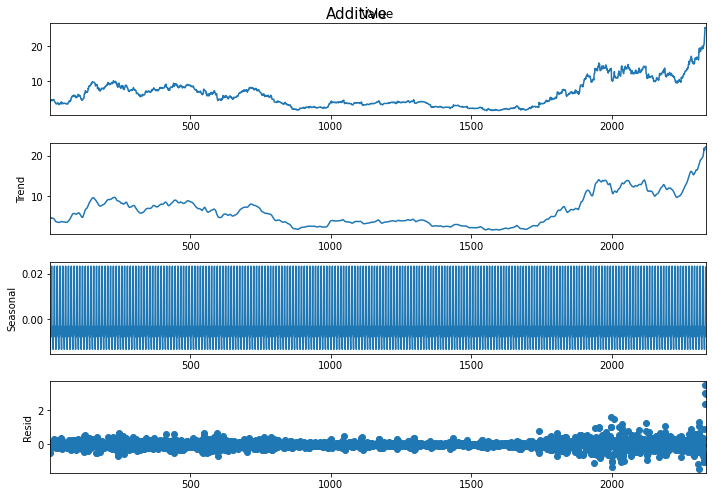

In [ ]:
plt.rcParams.update({'figure.figsize':(10,7)})

mult_decomp.plot().suptitle('Multiplicative',fontsize=15)
add_decomp.plot().suptitle('Additive',fontsize=15)
plt.show()

### When we analyze the residual plot of addtive and multiplicative seasonal decompose, residual plot for multiplicative is constant and addtive shows some variance towards the end, hence we use additive seasonal decomposition.

In [ ]:
# Extracting the componenets in Additive decomposition

add_d1 = pd.concat([add_decomp.resid,add_decomp.seasonal,add_decomp.trend,add_decomp.observed],axis=1)
add_d1.columns = ['Seas','trend','resid','actual_value']
add_d1.head(10)

,Seas,trend,resid,actual_value
1,-0.515196,-0.013285,4.788482,4.26
2,-0.231981,-0.003856,4.765836,4.53
3,-0.025410,-0.007781,4.743191,4.71
4,-0.022100,0.001555,4.720545,4.70
5,-0.180933,0.023033,4.697900,4.54
6,0.110080,0.023420,4.596500,4.73
7,-0.058274,-0.006726,4.625000,4.56
8,-0.157907,-0.003593,4.641500,4.48
9,0.006185,-0.003185,4.647000,4.65
10,-0.003918,-0.009582,4.643500,4.63


In [ ]:
# Extracting the components of Multiplicative decomposition

mult_d1 = pd.concat([mult_decomp.resid,mult_decomp.seasonal,mult_decomp.trend,mult_decomp.observed],axis=1)
mult_d1.columns = ['Seas','trend','resid','actual_value'] 
mult_d1.head(10)

,Seas,trend,resid,actual_value
1,0.891833,0.997535,4.788482,4.26
2,0.951532,0.998931,4.765836,4.53
3,0.995621,0.997370,4.743191,4.71
4,0.995503,1.000145,4.720545,4.70
5,0.964625,1.001829,4.697900,4.54
6,1.025681,1.003278,4.596500,4.73
7,0.985521,1.000431,4.625000,4.56
8,0.964511,1.000719,4.641500,4.48
9,1.000639,1.000007,4.647000,4.65
10,0.997337,0.999755,4.643500,4.63


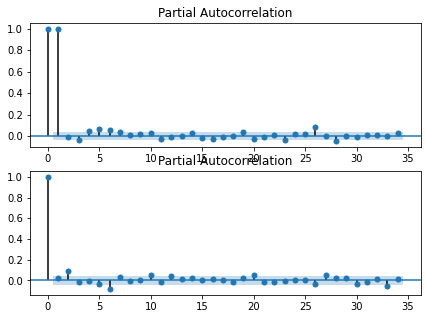

In [43]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# plot PACF

# P Value - 1

fig,ax = plt.subplots(2,figsize=(7,5))
ax[0] = plot_pacf(d1['Value'].dropna(),ax = ax[0])
ax[1] = plot_pacf(d1['Value'].diff().dropna(),ax = ax[1])

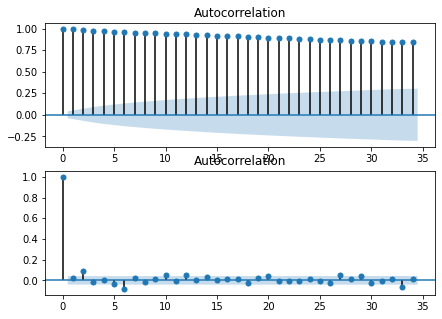

In [ ]:
# Plot ACF

# Q value - 1

fig, ax = plt.subplots(2,figsize=(7,5))

ax[0] = plot_acf(d1['Value'].dropna(),ax = ax[0])
ax[1] = plot_acf(d1['Value'].diff().dropna(),ax = ax[1])

In [ ]:
data = d1['Value']
train_data,test_data = data[0:int(len(data)*.9)],data[int(len(data)*.9):]
print('TRAINIG DATA SIZE: ',train_data.shape)
print('TESTING DATA SIZE: ',test_data.shape)

TRAINIG DATA SIZE:  (2101,)
TESTING DATA SIZE:  (234,)


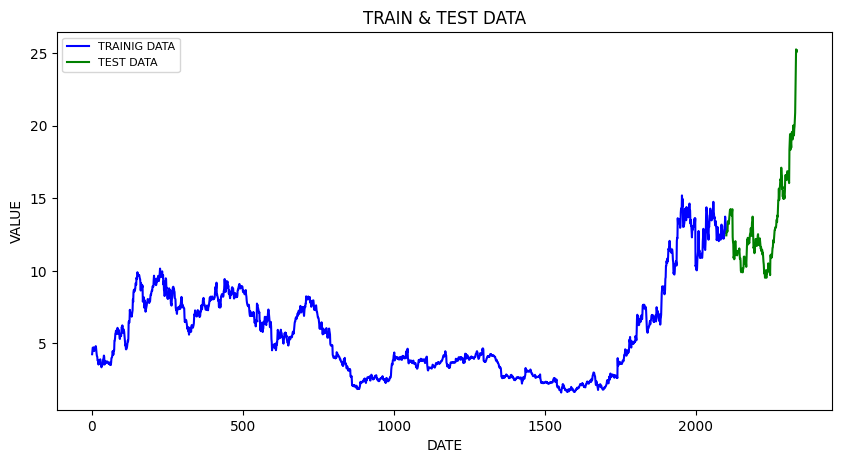

In [ ]:
plt.figure(figsize=(10,5),dpi=100)

plt.plot(train_data,color='BLUE',label='TRAINIG DATA')
plt.plot(test_data,color='GREEN',label = 'TEST DATA')
plt.xlabel('DATE')
plt.ylabel('VALUE')
plt.title('TRAIN & TEST DATA')
plt.legend(loc='upper left', fontsize=8)

## MODEL BUILDING

In [ ]:
model = ARIMA(train_data,order=(1,1,0))

model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Value   No. Observations:                 2100
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 145.877
Method:                       css-mle   S.D. of innovations              0.226
Date:                Tue, 14 Jul 2020   AIC                           -285.755
Time:                        11:09:33   BIC                           -268.806
Sample:                             1   HQIC                          -279.547
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0040      0.005      0.821      0.412      -0.006       0.013
ar.L1.D.Value    -0.0162      0.022     -0.743      0.457      -0.059       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -61.5408           +0.0000j           61.5408            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
# Forecast

fc,se,conf = model_fit.forecast(234,alpha=.05) # confidence = 95%

# Pandas Series

fc_series = pd.Series(fc,index= test_data.index)
lower_series = pd.Series(conf[:,0],index=test_data.index)
upper_series = pd.Series(conf[:,1],index=test_data.index)


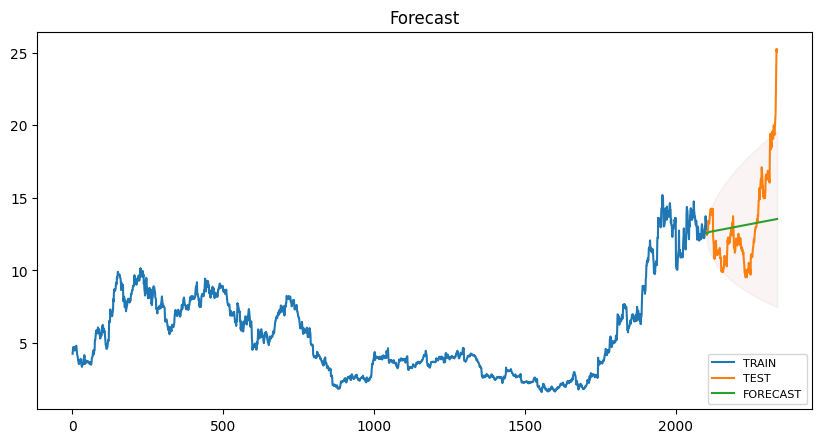

In [ ]:
# Plotting Graph

plt.figure(figsize=(10,5),dpi=100)
plt.plot(train_data,label='TRAIN')
plt.plot(test_data,label='TEST')
plt.plot(fc_series,label='FORECAST')
plt.fill_between(test_data.index,lower_series,upper_series,alpha=.05,color='BROWN')
plt.title('Forecast')
plt.legend(loc = 'lower right',fontsize=8)

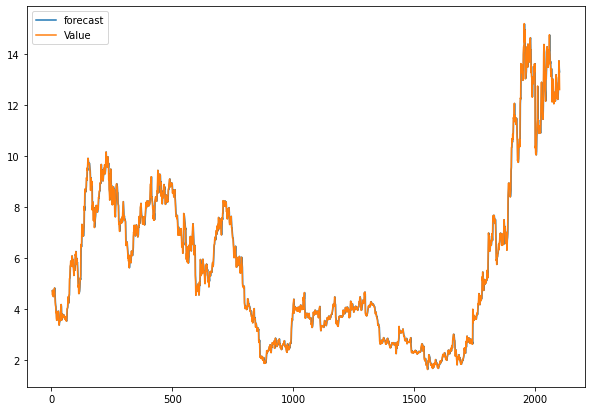

In [ ]:
model_fit.plot_predict()
plt.show()

### AUTO ARIMA

In [ ]:
auto_arima_model = auto_arima(test_data,start_p=0,start_q=0,
                            test='adf',
                            max_p=3, max_q=3, # maximum p and q
                            m=1,              # frequency of series
                            d=None,           # let model determine 'd'
                            seasonal=False,   # No Seasonality
                            start_P=0, 
                            D=0, 
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=273.465, BIC=280.367, Time=0.100 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=272.686, BIC=283.039, Time=0.044 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=273.017, BIC=283.370, Time=0.064 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=275.184, BIC=278.635, Time=0.017 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=273.766, BIC=287.570, Time=0.091 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=273.885, BIC=287.689, Time=0.179 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=275.765, BIC=293.021, Time=0.112 seconds
Total fit time: 0.620 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  234
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -133.343
Date:                Tue, 14 Jul 2020   AIC                

### Accuracy measures for time series forecast 

In [ ]:
# Mean Absolute Percentage Error [MAPE]

mape = np.mean(np.abs(fc-test_data)/np.abs(test_data))
print('MAPE: %0.3f'% mape)

# Mean Error [ME]

me = np.mean(fc-test_data)
print('ME: %0.3f'% me)

# Mean Absoulte Error [MAE]

mae = np.mean(np.abs(fc-test_data))
print('MAE: %0.3f'% mae)

# Root Mean Squared Error [RMSE]

rmse = np.mean((fc-test_data)**2)**.5
print('RMSE: %0.3f'% rmse)

MAPE: 0.164
ME: -0.208
MAE: 2.276
RMSE: 3.006


### With MAPE score at 16% and RMSE at 3.006 the model has good predictive power in forcasting time series value. The accuracy will be better if we shorten the forecast period. 